In [1]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np
import pandas as pd
from collections import Counter

scv.settings.verbosity = 3
scv.settings.set_figure_params("scvelo")
cr.settings.verbosity = 2

In [2]:
data=sc.read_loom("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out/Lung_CS-NC/PLOT/Neu.loom")

In [3]:
#添加UMAP
obs= pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out/Lung_CS-NC/PLOT/Neu.metadata.csv",delimiter=",", index_col=0)
umap=pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out/Lung_CS-NC/PLOT/Neu.umap.csv",delimiter=",", index_col=0)
pca=pd.read_csv("/home/DATA/zhengjie/DATA-yu/process-data-matrix/out/Lung_CS-NC/PLOT/Neu.pca.csv",delimiter=",", index_col=0)

In [4]:
data.obsm['X_umap']=umap
data.obsm['X_pca']=pca

obs=obs[["group","sample","celltype"]]
obs["cellname"]=obs.index
umap["cellname"]=umap.index
obs_umap=obs.merge(umap)

In [5]:
obs_umap

group    sample celltype              cellname    UMAP_1    UMAP_2
0       NC  L-NC-F12       N2  AAACCCACATGTCTAG-1_1 -0.742661  2.779540
1       NC  L-NC-F12       N2  AAACGAAGTTACCGTA-1_1  0.449166  1.259000
2       NC  L-NC-F12       N2  AAACGAATCGACATAC-1_1  1.491372  1.590728
3       NC  L-NC-F12       N2  AAACGCTAGCGACTTT-1_1  0.075501  1.949154
4       NC  L-NC-F12       N1  AAAGAACCACTCGATA-1_1  1.956660  0.885562
...    ...       ...      ...                   ...       ...       ...
9748    CS  L-CS-F19       N3  TTTGGTTCAGCTCTGG-1_4  7.248513 -0.371101
9749    CS  L-CS-F19       N1  TTTGGTTGTCGGTAAG-1_4 -0.376274 -2.781003
9750    CS  L-CS-F19       N1  TTTGGTTGTTTCGTAG-1_4 -1.352380 -2.118511
9751    CS  L-CS-F19       N1  TTTGGTTTCCTAAGTG-1_4 -1.421721 -2.893329
9752    CS  L-CS-F19       N1  TTTGTTGAGGTCGTAG-1_4 -1.364732 -3.038502

[9753 rows x 6 columns]

In [6]:
### loom文件读取
#nc
f12="/home/DATA/zhengjie/DATA/yuzuoren/F12_PYMT2/velocyto/F12_PYMT2.loom"
f17="/home/DATA/zhengjie/DATA/yuzuoren/F17_PYMT2/velocyto/F17_PYMT2.loom"
#cs
f15="/home/DATA/zhengjie/DATA/yuzuoren/F15_PYMT2/velocyto/F15_PYMT2.loom"
f19="/home/DATA/zhengjie/DATA/yuzuoren/F19_PYMT2/velocyto/F19_PYMT2.loom"

In [7]:
    ## F12
f12="/home/DATA/zhengjie/DATA/yuzuoren/F12_PYMT2/velocyto/F12_PYMT2.loom"
obs3=obs_umap[obs_umap["sample"]=='L-NC-F12']

f12 = scv.read(f12, cache=True)
f12.var
f12.var_names_make_unique
f12.obs
f12.obs=f12.obs.rename(index = lambda x: x.replace('F12_PYMT2:', ''))
f12.obs=f12.obs.rename(index = lambda x: x.replace('x', '-1_1'))
f12.obs.head()

f12_filter = f12[np.isin(f12.obs.index,obs3["cellname"])]
f12_filter

index=pd.DataFrame(f12_filter.obs.index)
index = index.rename(columns = {'CellID':'cellname'})
obs3=index.merge(obs3,on="cellname")
obs3.index=obs3['cellname']
obs3.head()
#将umap信息加入sample
obs3_umap = obs3.iloc[:,4:]
obs3_umap.head()
f12_filter.obsm["X_umap"]=obs3_umap.values
#将cell_clusters加入sample_one
obs3_cluster = obs3.iloc[:,3]
obs3_cluster.head()
f12_filter.obs['cell_clusters']=obs3_cluster.values

## F17
f17="/home/DATA/zhengjie/DATA/yuzuoren/F17_PYMT2/velocyto/F17_PYMT2.loom"
obs3=obs_umap[obs_umap["sample"]=='L-NC-F17']
f17 = scv.read(f17, cache=True)
f17.var
f17.var_names_make_unique
f17.obs
f17.obs=f17.obs.rename(index = lambda x: x.replace('F17_PYMT2:', ''))
f17.obs=f17.obs.rename(index = lambda x: x.replace('x', '-1_2'))
f17.obs.head()

f17_filter = f17[np.isin(f17.obs.index,obs3["cellname"])]

index=pd.DataFrame(f17_filter.obs.index)
index = index.rename(columns = {'CellID':'cellname'})
obs3=index.merge(obs3,on="cellname")
obs3.index=obs3['cellname']
obs3.head()
#将umap信息加入sample
obs3_umap = obs3.iloc[:,4:]
obs3_umap.head()
f17_filter.obsm["X_umap"]=obs3_umap.values
#将cell_clusters加入sample_one
obs3_cluster = obs3.iloc[:,3]
obs3_cluster.head()
f17_filter.obs['cell_clusters']=obs3_cluster.values

## F15
f15="/home/DATA/zhengjie/DATA/yuzuoren/F15_PYMT2/velocyto/F15_PYMT2.loom"
obs3=obs_umap[obs_umap["sample"]=='L-CS-F15']

f15 = scv.read(f15, cache=True)
f15.var
f15.var_names_make_unique
f15.obs
f15.obs=f15.obs.rename(index = lambda x: x.replace('F15_PYMT2:', ''))
f15.obs=f15.obs.rename(index = lambda x: x.replace('x', '-1_3'))
f15.obs.head()

f15_filter = f15[np.isin(f15.obs.index,obs3["cellname"])]

index=pd.DataFrame(f15_filter.obs.index)
index = index.rename(columns = {'CellID':'cellname'})
obs3=index.merge(obs3,on="cellname")
obs3.index=obs3['cellname']
obs3.head()
#将umap信息加入sample
obs3_umap = obs3.iloc[:,4:]
obs3_umap.head()
f15_filter.obsm["X_umap"]=obs3_umap.values
#将cell_clusters加入sample_one
obs3_cluster = obs3.iloc[:,3]
obs3_cluster.head()
f15_filter.obs['cell_clusters']=obs3_cluster.values

## F19
f19="/home/DATA/zhengjie/DATA/yuzuoren/F19_PYMT2/velocyto/F19_PYMT2.loom"
obs3=obs_umap[obs_umap["sample"]=='L-CS-F19']

f19 = scv.read(f19, cache=True)
f19.var
f19.var_names_make_unique
f19.obs
f19.obs=f19.obs.rename(index = lambda x: x.replace('F19_PYMT2:', ''))
f19.obs=f19.obs.rename(index = lambda x: x.replace('x', '-1_4'))
f19.obs.head()

f19_filter = f19[np.isin(f19.obs.index,obs3["cellname"])]

index=pd.DataFrame(f19_filter.obs.index)
index = index.rename(columns = {'CellID':'cellname'})
obs3=index.merge(obs3,on="cellname")
obs3.index=obs3['cellname']
obs3.head()
#将umap信息加入sample
obs3_umap = obs3.iloc[:,4:]
obs3_umap.head()
f19_filter.obsm["X_umap"]=obs3_umap.values
#将cell_clusters加入sample_one
obs3_cluster = obs3.iloc[:,3]
obs3_cluster.head()
f19_filter.obs['cell_clusters']=obs3_cluster.values

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zhengjie/software/anaconda3/envs/stlea

In [8]:
f12_filter.var_names_make_unique()
f17_filter.var_names_make_unique()
f15_filter.var_names_make_unique()
f19_filter.var_names_make_unique()
adata = f12_filter.concatenate(f17_filter,f15_filter,f19_filter,index_unique='#')
adata.obs=adata.obs.rename(index = lambda x: x.replace('#0', ''))
adata.obs=adata.obs.rename(index = lambda x: x.replace('#1', ''))
adata.obs=adata.obs.rename(index = lambda x: x.replace('#2', ''))
adata.obs=adata.obs.rename(index = lambda x: x.replace('#3', ''))
adata

AnnData object with n_obs × n_vars = 9753 × 32285
    obs: 'Clusters', '_X', '_Y', 'cell_clusters', 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [9]:
adata.obs_names
adata.obsm['X_pca']=pca.loc[adata.obs_names,]
adata

AnnData object with n_obs × n_vars = 9753 × 32285
    obs: 'Clusters', '_X', '_Y', 'cell_clusters', 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_umap', 'X_pca'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [99]:
f12_filter

AnnData object with n_obs × n_vars = 1187 × 32285
    obs: 'Clusters', '_X', '_Y', 'cell_clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [100]:
adata
gene_overlap=list(set(data.var_names).intersection(set(adata.var_names)))
cell_overlap=list(set(data.obs_names).intersection(set(adata.obs_names)))
data_use=adata[cell_overlap,gene_overlap]
data_bk=data_use[cell_overlap,gene_overlap]
data_use.X=data_bk.X

adata=data_use

In [10]:
adata

AnnData object with n_obs × n_vars = 9753 × 32285
    obs: 'Clusters', '_X', '_Y', 'cell_clusters', 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_umap', 'X_pca'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [11]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
scv.pp.moments(adata, n_pcs=30, n_neighbors=20)

Filtered out 29636 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


2022-06-03 20:21:05.845376: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/zhengjie/usr/lib:/home/zhengjie/usr/lib64
2022-06-03 20:21:05.845435: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [12]:
scv.tl.recover_dynamics(adata, n_jobs=1)

recovering dynamics (using 1/32 cores)


  0%|          | 0/212 [00:00<?, ?gene/s]

    finished (0:03:37) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


In [13]:
scv.tl.velocity(adata, mode="dynamical")
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/32 cores)


  0%|          | 0/9753 [00:00<?, ?cells/s]

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:11) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


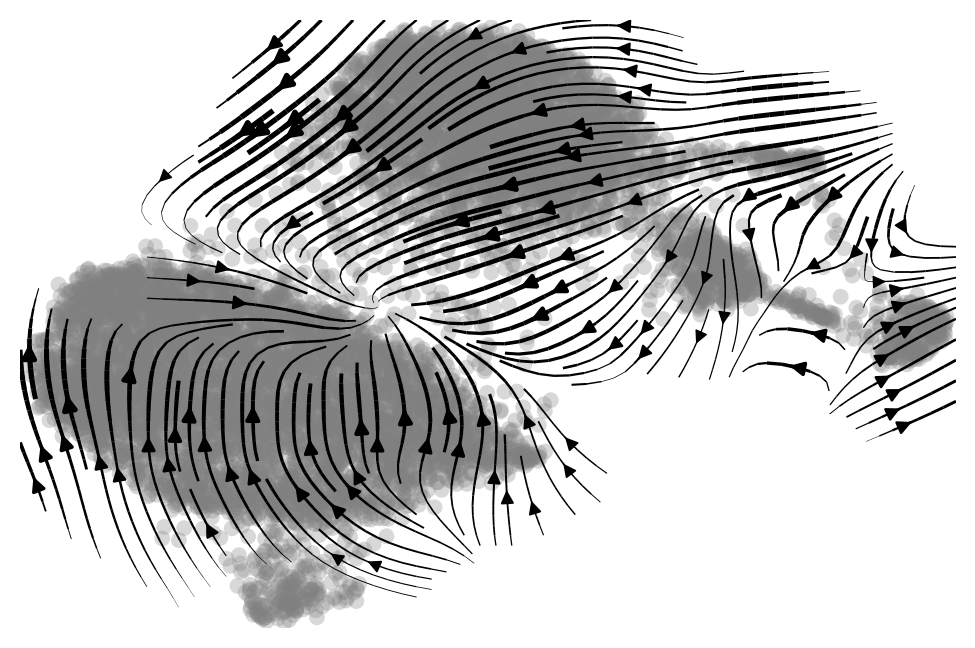

In [14]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", legend_fontsize=12, title="", smooth=1.8, min_mass=3
)

ident_colours = ["#73C0A2", "#F28C60", "#8E9EC9", "#DF89C3"] 
scv.pl.velocity_embedding_stream(sample_one, basis='X_umap',color = "cell_clusters",palette = ident_colours,smooth=2,density=2,c,alpha=0.5,figsize=(5,5),save="scvelo-neu.velo.png",fontsize=10,legend_fontsize=13,dpi=150,title="Neu-scVelo")

In [15]:
cr.tl.terminal_states(adata, cluster_key="cell_clusters", weight_connectivities=0.2)

Accessing `adata.obsp['T_fwd']`
Computing transition matrix based on logits using `'deterministic'` mode


/tmp/ipykernel_182557/3554132538.py:1: DeprecationWarning: `cellrank.tl.terminal_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.terminal_states(adata, cluster_key="cell_clusters", weight_connectivities=0.2)
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/cellrank/tl/_init_term_states.py:156: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  kernel = transition_matrix(


Estimating `softmax_scale` using `'deterministic'` mode


  0%|          | 0/9753 [00:00<?, ?cell/s]

Setting `softmax_scale=4.9986`


  0%|          | 0/9753 [00:00<?, ?cell/s]

    Finish (0:00:16)
Using a connectivity kernel with weight `0.2`
Computing transition matrix based on `adata.obsp['connectivities']`
    Finish (0:00:00)
Computing eigendecomposition of the transition matrix
Adding `adata.uns['eigendecomposition_fwd']`
       `.eigendecomposition`
    Finish (0:00:01)
Computing Schur decomposition
Mat Object: 1 MPI processes
  type: seqdense
9.9999999999999656e-01 -8.4962509522339786e-04 
0.0000000000000000e+00 9.7584513222036795e-01 
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:01)
Computing `2` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Adding `adata.obs['terminal_states']`
       `adata.obs['terminal_states_probs']`
       `.terminal_states`

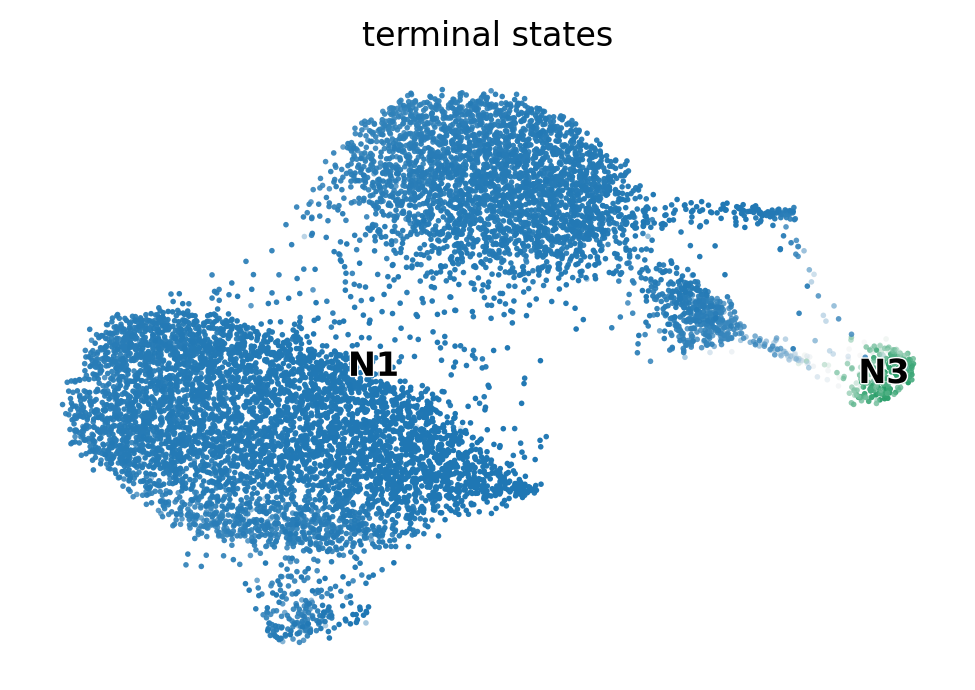

In [16]:
cr.pl.terminal_states(adata)

Accessing `adata.obsp['T_bwd']`
Computing transition matrix based on logits using `'deterministic'` mode


/tmp/ipykernel_182557/4179374744.py:1: DeprecationWarning: `cellrank.tl.initial_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.initial_states(adata, cluster_key="cell_clusters")
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/cellrank/tl/_init_term_states.py:156: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  kernel = transition_matrix(


Estimating `softmax_scale` using `'deterministic'` mode


  0%|          | 0/9753 [00:00<?, ?cell/s]

Setting `softmax_scale=4.9986`


  0%|          | 0/9753 [00:00<?, ?cell/s]

    Finish (0:00:08)
Using a connectivity kernel with weight `0.2`
Computing transition matrix based on `adata.obsp['connectivities']`
    Finish (0:00:00)
Computing eigendecomposition of the transition matrix
Adding `adata.uns['eigendecomposition_bwd']`
       `.eigendecomposition`
    Finish (0:00:00)
Computing Schur decomposition
Mat Object: 1 MPI processes
  type: seqdense
9.9999999999999478e-01 -2.6301899709335913e-02 
0.0000000000000000e+00 9.8305602861167729e-01 
Adding `adata.uns['eigendecomposition_bwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Computing `2` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Adding `adata.obs['initial_states']`
       `adata.obs['initial_states_probs']`
       `.terminal_states`
 

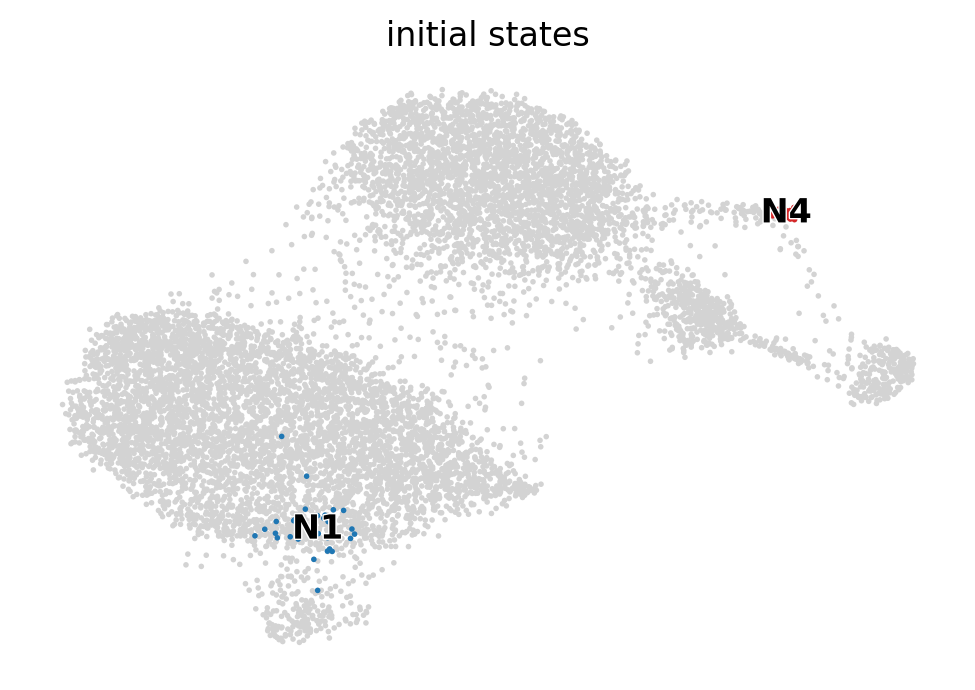

In [17]:
cr.tl.initial_states(adata, cluster_key="cell_clusters")
cr.pl.initial_states(adata, discrete=True)

Computing absorption probabilities


/tmp/ipykernel_182557/1878844763.py:1: DeprecationWarning: `cellrank.tl.lineages` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.lineages(adata)


  0%|          | 0/2 [00:00<?, ?/s]

Adding `adata.obsm['to_terminal_states']`
       `.absorption_probabilities`
    Finish (0:00:00)


[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: [0]PETSC ERROR: 

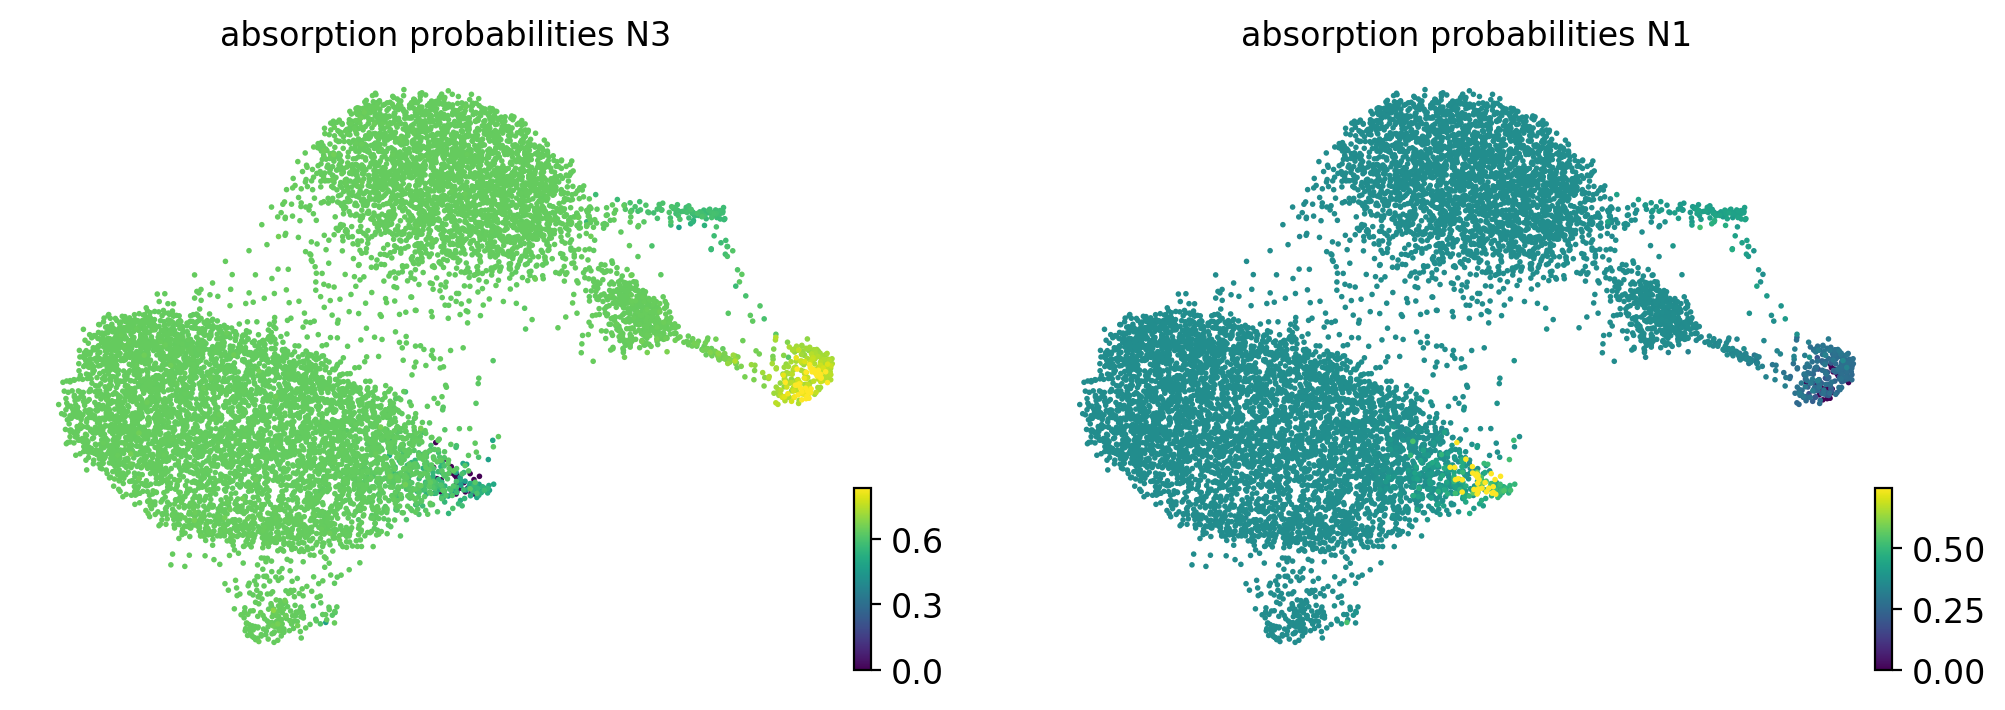

In [18]:
cr.tl.lineages(adata)
cr.pl.lineages(adata, same_plot=False)

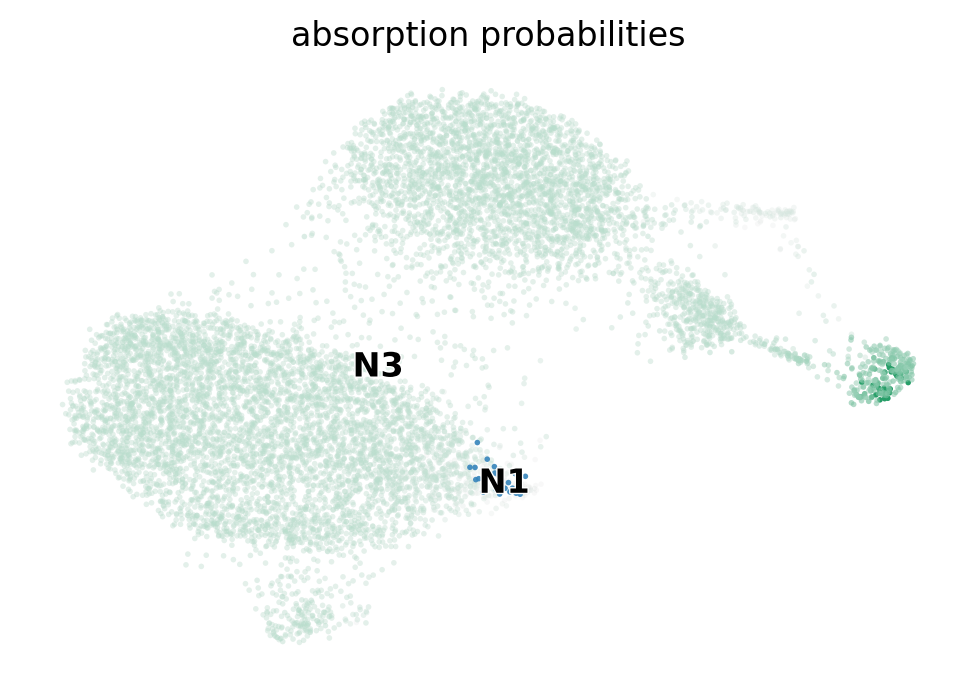

In [63]:
cr.pl.lineages(adata, same_plot=True)

In [19]:
scv.tl.recover_latent_time(
    adata, root_key="initial_states_probs", end_key="terminal_states_probs"
)

computing latent time using initial_states_probs, terminal_states_probs as prior
    finished (0:00:03) --> added 
    'latent_time', shared time (adata.obs)


In [20]:
scv.tl.paga(
    adata,
    groups="cell_clusters",
    root_key="initial_states_probs",
    end_key="terminal_states_probs",
    use_time_prior="velocity_pseudotime",
)

running PAGA using priors: ['velocity_pseudotime', 'initial_states_probs', 'terminal_states_probs']
    finished (0:00:05) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/networkx/convert.py:157: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  return nx.from_scipy_sparse_matrix(data, create_using=create_using)


saving figure to file ./figures/scvelo_cellrank-neu-paga3.pdf


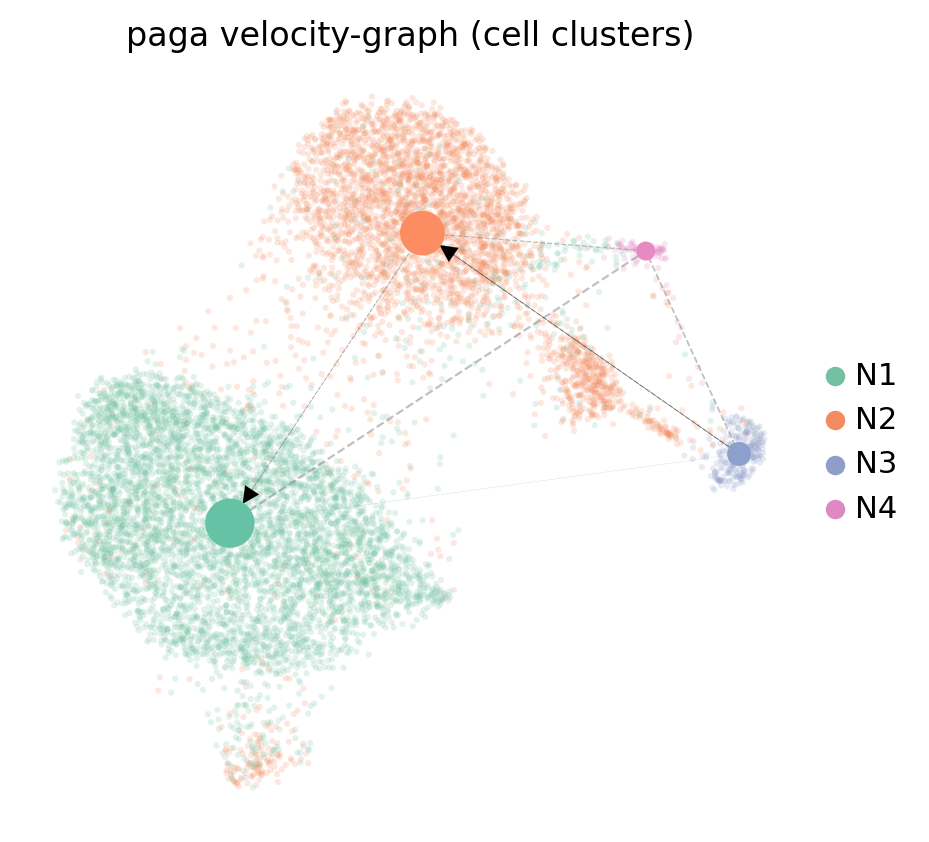

In [36]:
ident_colours = ["#73C0A2", "#F28C60", "#8E9EC9", "#DF89C3"] 
#ident_colours = ["grey", "grey", "grey", "grey"] 

scv.pl.paga(adata,
    cluster_key="cell_clusters",
            color = "cell_clusters",palette = ident_colours,
            colors=["#66C2A5", "#FC8D62", "#8DA0CB", "#E78AC3"],
            save="cellrank-neu-paga3.pdf",
            size=20,
            alpha=0.2,
            figsize=(5,5),
            basis="umap")

In [ ]:
scv.pl.paga()

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/networkx/convert.py:157: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  return nx.from_scipy_sparse_matrix(data, create_using=create_using)
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/fontTools/misc/py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(


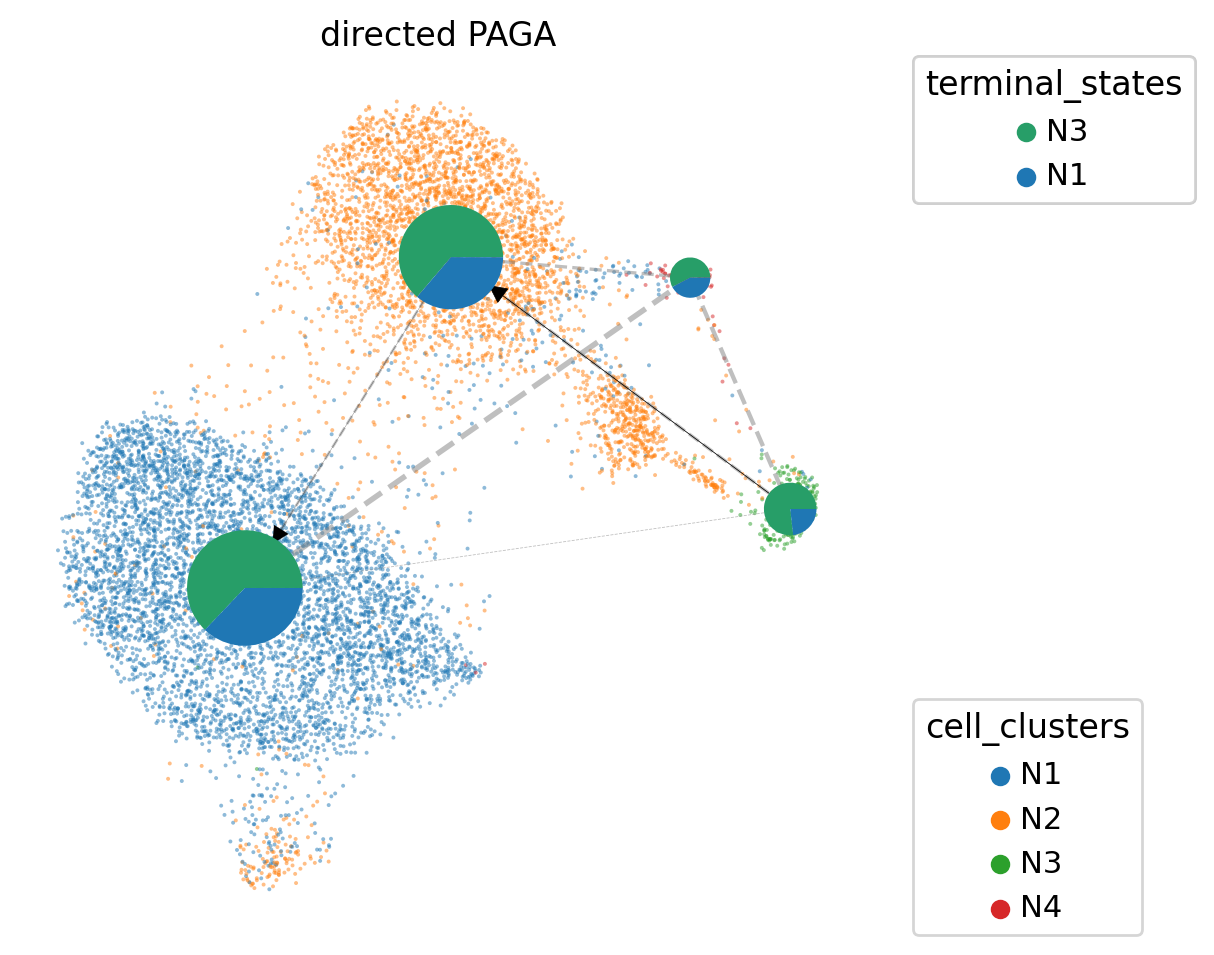

In [21]:
cr.pl.cluster_fates(
    adata,
    mode="paga_pie",
    cluster_key="cell_clusters",
    basis="umap",
    legend_kwargs={"loc": "top right out"},
    legend_loc="bottom right out",
    node_size_scale=5,
    edge_width_scale=1,
    max_edge_width=4,
    title="directed PAGA",
    figsize=(5,5),
    color={"N1":"#73C0A2","N2": "#F28C60","N3": "#8E9EC9","N4": "#DF89C3"},
    #colors=["#73C0A2", "#F28C60", "#8E9EC9", "#DF89C3"] 
    save="cellrank-neu.pdf"
)

In [ ]:
cr.pl.cluster_fates()
scv.pl.paga()

In [211]:
cr.tl.lineage_drivers(adata)

/tmp/ipykernel_72044/1721556810.py:1: DeprecationWarning: `cellrank.tl.lineage_drivers` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.lineage_drivers(adata)


Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:04)


N3_corr        N3_pval        N3_qval  N3_ci_low  N3_ci_high  \
Gene                                                                    
Rpl12   0.692725   0.000000e+00   0.000000e+00   0.682258    0.702908   
Tmsb10  0.690566   0.000000e+00   0.000000e+00   0.680040    0.700808   
Rps20   0.686335   0.000000e+00   0.000000e+00   0.675692    0.696692   
Rps4x   0.668083   0.000000e+00   0.000000e+00   0.656946    0.678927   
Rps5    0.652112   0.000000e+00   0.000000e+00   0.640556    0.663374   
...          ...            ...            ...        ...         ...   
Ftl1   -0.169475   4.705953e-64   1.028587e-62  -0.188687   -0.150133   
Fth1   -0.176093   4.116194e-69   9.303534e-68  -0.195257   -0.156794   
Ccrl2  -0.177521   3.130462e-70   7.156883e-69  -0.196674   -0.158231   
Tyrobp -0.201984   6.225628e-91   1.491900e-89  -0.220945   -0.182870   
Srgn   -0.240003  4.625219e-129  1.243184e-127  -0.258618   -0.221210   

        N1_1_corr      N1_1_pval      N1_1_qval  N1_1_ci_low  N1_1_ci_high  \
Gene                                                                         
Rpl12   -0.241282  1.784291e-130  9.591771e-129    -0.259884     -0.222501   
Tmsb10  -0.240842  5.481332e-130  2.869044e-128    -0.259448     -0.222056   
Rps20   -0.269781  2.834547e-164  2.684720e-162    -0.288085     -0.251279   
Rps4x   -0.232852  2.554114e-121  1.080879e-119    -0.251537     -0.213995   
Rps5    -0.264867  3.976560e-158  3.438860e-156    -0.283225     -0.246315   
...           ...            ...            ...          ...           ...   
Ftl1     0.011073   2.742299e-01   2.998589e-01    -0.008776      0.030912   
Fth1     0.261126  1.548507e-153  1.283325e-151     0.242536      0.279524   
Ccrl2    0.164218   3.489046e-60   5.783093e-59     0.144844      0.183467   
Tyrobp  -0.038079   1.686952e-04   2.682132e-04    -0.057882     -0.018246   
Srgn     0.045673   6.390835e-06   1.183554e-05     0.025850      0.065461   

        N1_2_corr      N1_2_pval      N1_2_qval  N1_2_ci_low  N1_2_ci_high  \
Gene                                                                         
Rpl12   -0.400112   0.000000e+00   0.000000e+00    -0.416651     -0.383310   
Tmsb10  -0.411019   0.000000e+00   0.000000e+00    -0.427379     -0.394389   
Rps20   -0.376915   0.000000e+00   0.000000e+00    -0.393816     -0.359760   
Rps4x   -0.397949   0.000000e+00   0.000000e+00    -0.414522     -0.381112   
Rps5    -0.345488  3.079408e-277  6.124943e-275    -0.362847     -0.327890   
...           ...            ...            ...          ...           ...   
Ftl1     0.301391  3.739267e-207  3.718701e-205     0.283239      0.319328   
Fth1     0.247466  1.965872e-137  1.028979e-135     0.228743      0.266007   
Ccrl2    0.276276  1.306876e-172  8.385086e-171     0.257843      0.294508   
Tyrobp   0.227379  1.421122e-115  5.435792e-114     0.208473      0.246115   
Srgn     0.413863   0.000000e+00   0.000000e+00     0.397280      0.430177   

         N2_corr        N2_pval        N2_qval  N2_ci_low  N2_ci_high  
Gene                                                                   
Rpl12  -0.022277   2.780081e-02   3.645077e-02  -0.042106   -0.002432  
Tmsb10 -0.001608   8.738814e-01   8.931912e-01  -0.021454    0.018240  
Rps20  -0.008030   4.277997e-01   4.662430e-01  -0.027873    0.011818  
Rps4x  -0.001261   9.009296e-01   9.170670e-01  -0.021107    0.018586  
Rps5   -0.015673   1.216803e-01   1.454460e-01  -0.035509    0.004175  
...          ...            ...            ...        ...         ...  
Ftl1   -0.259274  2.708071e-151  1.737533e-149  -0.277692   -0.240666  
Fth1   -0.537171   0.000000e+00   0.000000e+00  -0.551142   -0.522899  
Ccrl2  -0.436525   0.000000e+00   0.000000e+00  -0.452452   -0.420320  
Tyrobp -0.013305   1.889150e-01   2.201241e-01  -0.033143    0.006544  
Srgn   -0.390969   0.000000e+00   0.000000e+00  -0.407652   -0.374024  

[1989 rows x 20 columns]

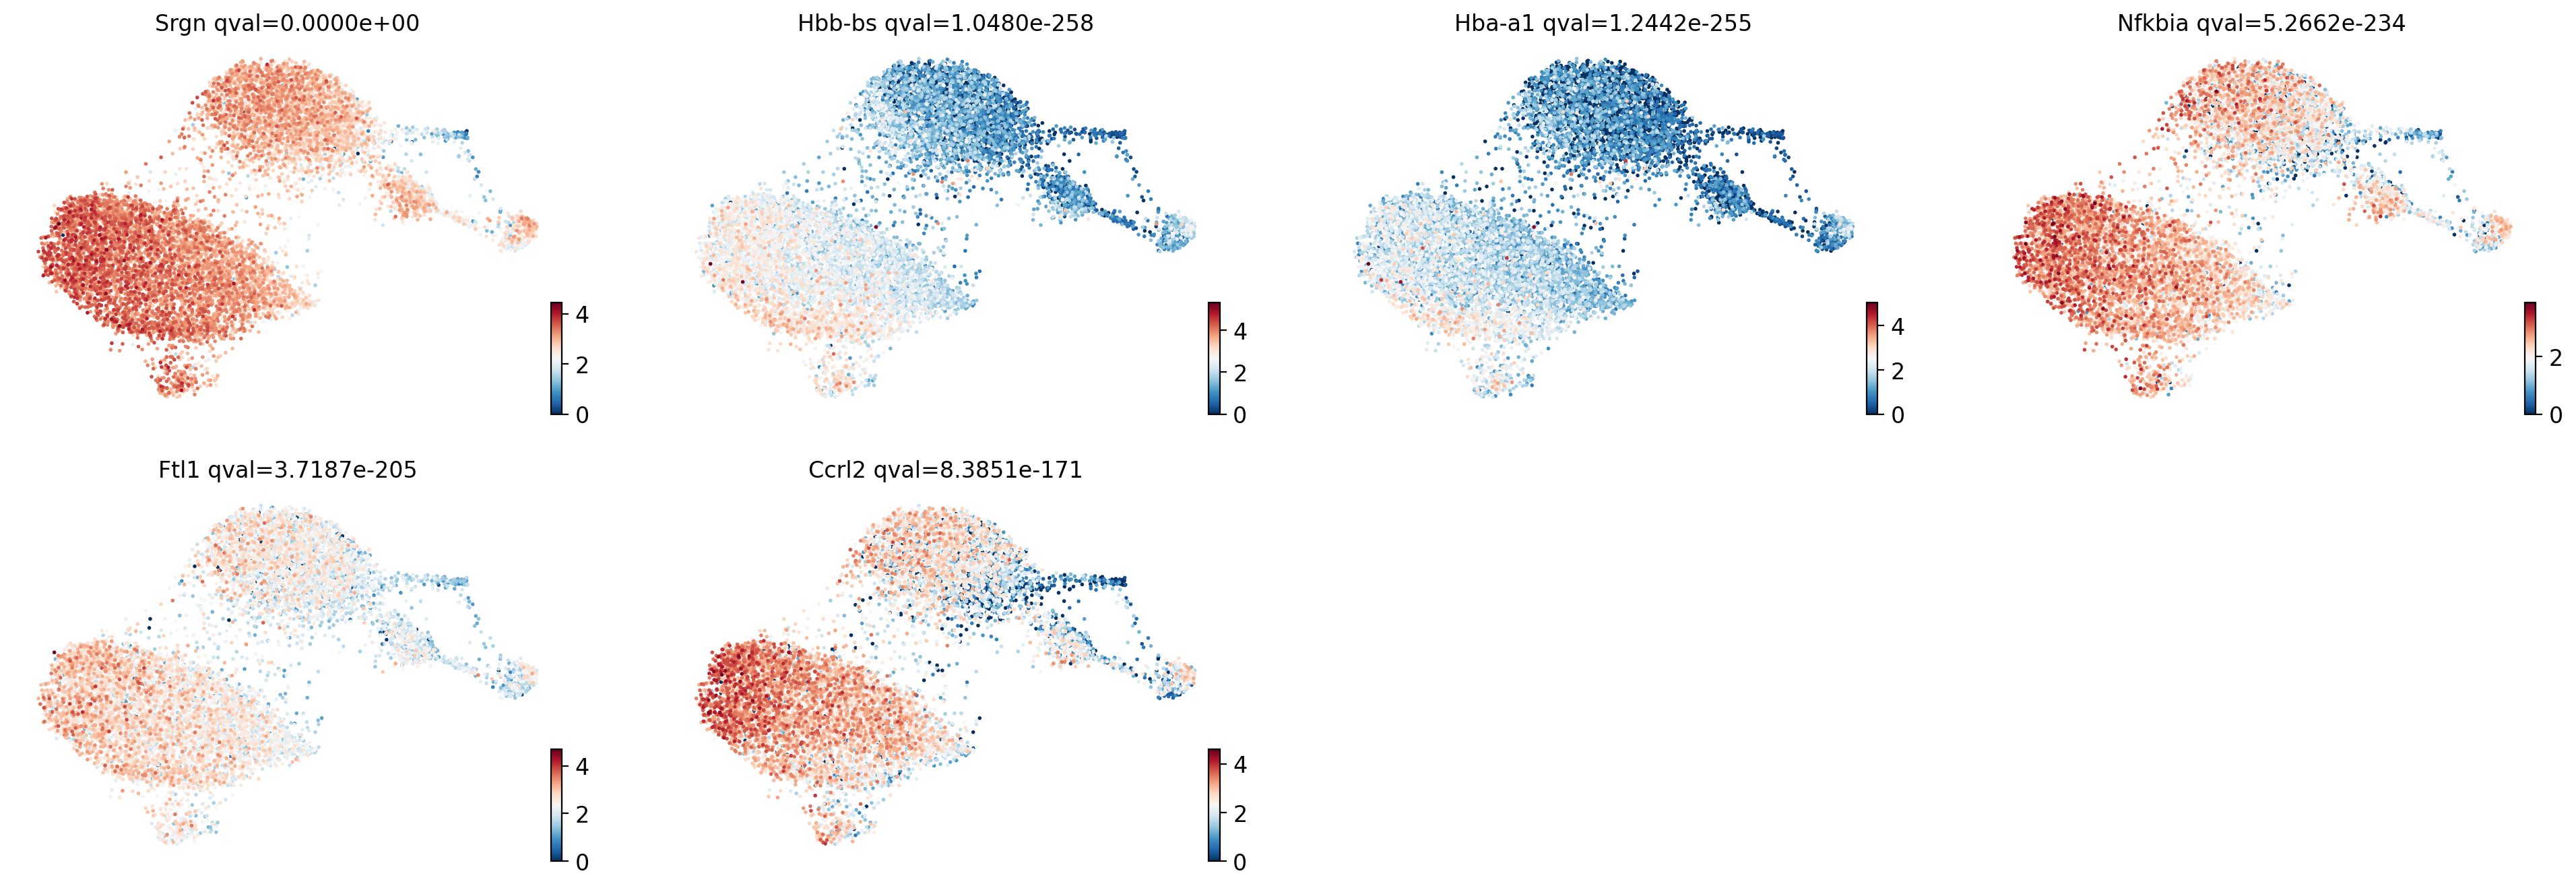

In [213]:
cr.pl.lineage_drivers(adata, lineage="N1_2", n_genes=6)

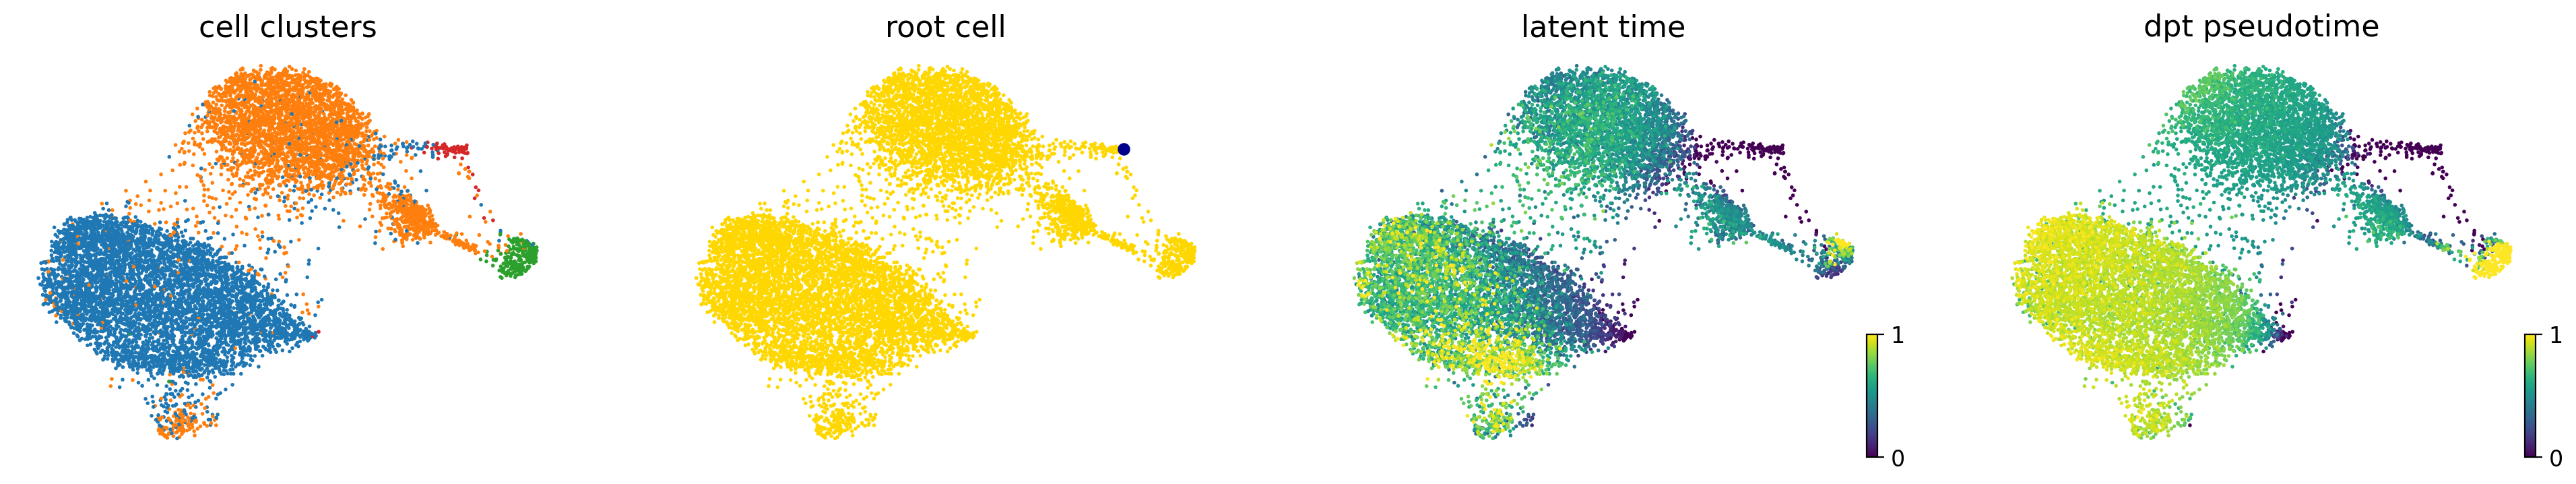

In [215]:
root_idx = np.where(adata.obs["initial_states"] == "N4")[0][0]
adata.uns["iroot"] = root_idx
sc.tl.dpt(adata)

scv.pl.scatter(
    adata,
    color=["cell_clusters", root_idx, "latent_time", "dpt_pseudotime"],
    fontsize=16,
    cmap="viridis",
    perc=[2, 98],
    colorbar=True,
    rescale_color=[0, 1],
    title=["cell_clusters", "root cell", "latent time", "dpt pseudotime"],
)

Computing trends using `1` core(s)


  0%|          | 0/3 [00:00<?, ?gene/s]

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the prec

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the prec

    Finish (0:00:03)
Plotting trends


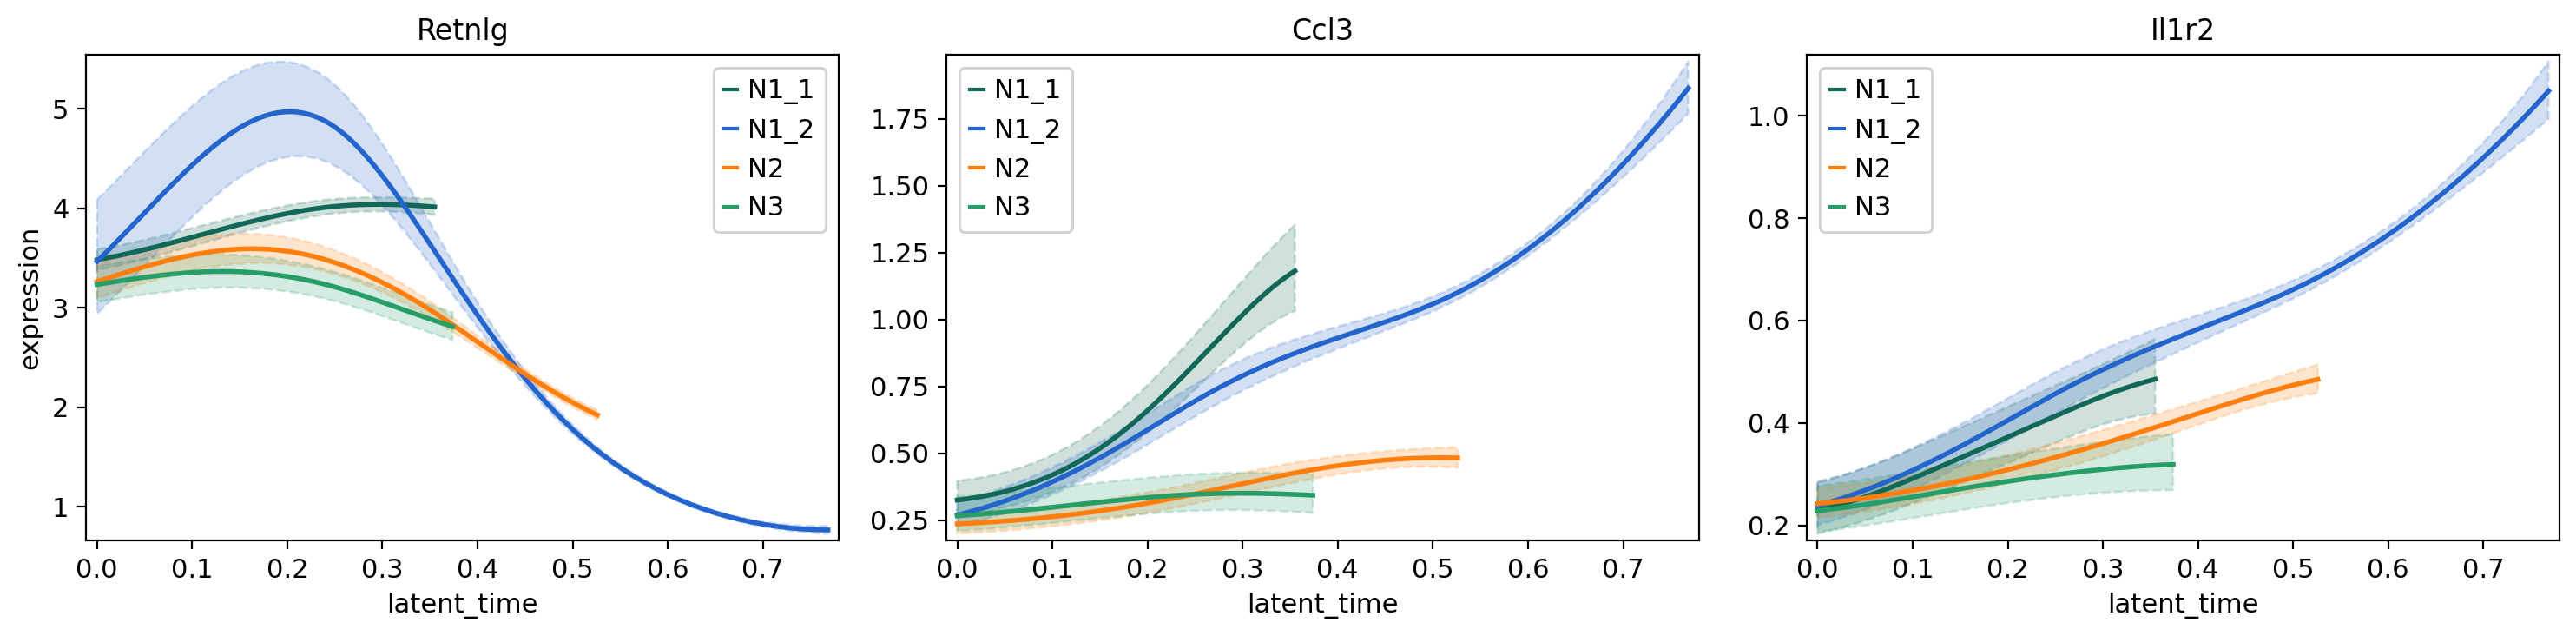

In [220]:
model = cr.ul.models.GAM(adata)
cr.pl.gene_trends(
    adata,
    model=model,
    data_key="X",
    genes=["Retnlg", "Ccl3", "Il1r2"],
    ncols=3,
    time_key="latent_time",
    same_plot=True,
    hide_cells=True,
    figsize=(15, 4),
    n_test_points=200,
)

Computing trends using `1` core(s)


  0%|          | 0/100 [00:00<?, ?gene/s]

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the prec

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the prec

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the prec

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the prec

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the prec

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the prec

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the prec

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the prec

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the prec

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the prec

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the prec

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the prec

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the prec

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the prec

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:649: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bases = (x >= aug_knots[:-1]).astype(np.int) * \
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/pygam/utils.py:650: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the prec

    Finish (0:00:32)


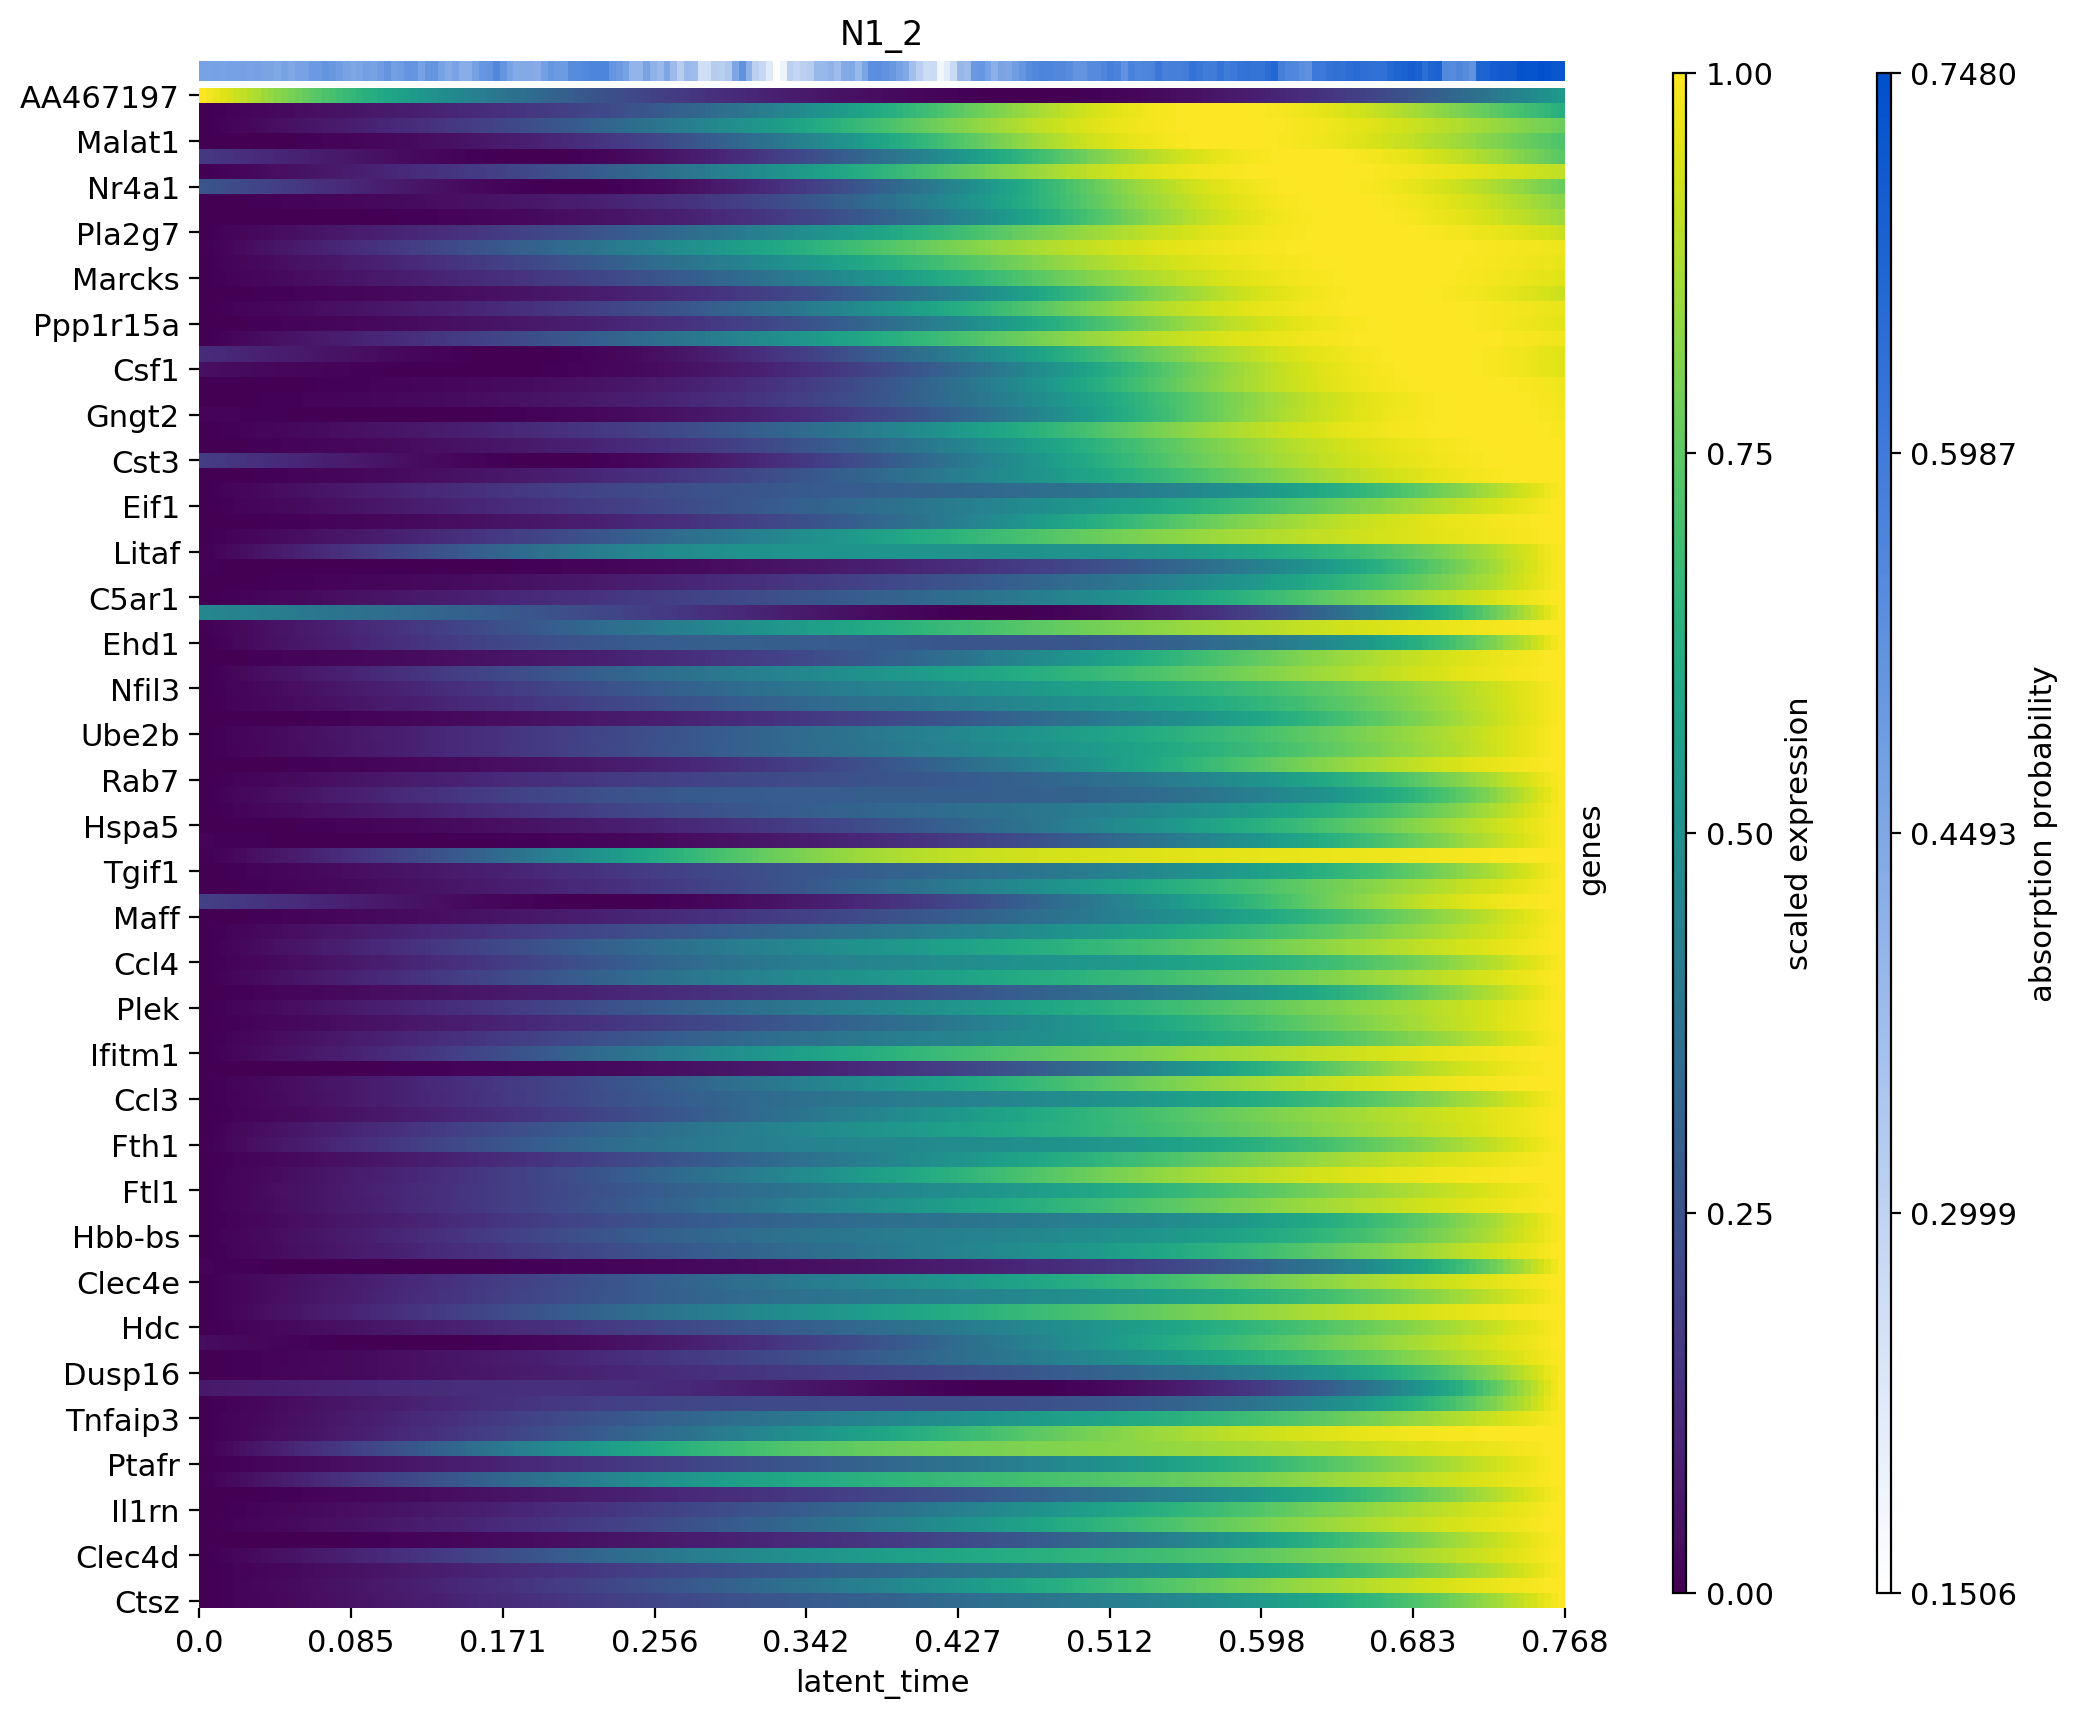

In [222]:
cr.pl.heatmap(
    adata,
    model,
    genes=adata.varm['terminal_lineage_drivers']["N1_2_corr"].sort_values(ascending=False).index[:100],
    show_absorption_probabilities=True,
    lineages="N1_2",
    n_jobs=1,
    backend="loky",
)

In [217]:
adata.varm['terminal_lineage_drivers']

N3_corr       N3_pval       N3_qval  N3_ci_low  N3_ci_high  \
Gene                                                                         
Il10rb        -0.019490  5.426366e-02  1.038791e-01  -0.039321    0.000357   
Tarm1         -0.027139  7.353478e-03  1.816903e-02  -0.046960   -0.007296   
5430427O19Rik -0.031143  2.097135e-03  5.866668e-03  -0.050958   -0.011303   
Card19        -0.073881  2.702655e-13  2.337209e-12  -0.093590   -0.054113   
Gpi1           0.015248  1.321383e-01  2.170298e-01  -0.004600    0.035084   
...                 ...           ...           ...        ...         ...   
Tm9sf3         0.040497  6.308809e-05  2.381067e-04   0.020667    0.060295   
Asb7           0.020357  4.438752e-02  8.732620e-02   0.000511    0.040188   
Nedd8          0.024543  1.535604e-02  3.490648e-02   0.004698    0.044368   
Ptpn2          0.008467  4.030886e-01  5.309557e-01  -0.011381    0.028309   
Tsc22d2        0.023649  1.951225e-02  4.278648e-02   0.003804    0.043475   

               N1_1_corr     N1_1_pval     N1_1_qval  N1_1_ci_low  \
Gene                                                                
Il10rb         -0.021103  3.715434e-02  4.517532e-02    -0.040933   
Tarm1           0.058846  5.979392e-09  1.497860e-08     0.039045   
5430427O19Rik  -0.017389  8.595001e-02  1.005024e-01    -0.037222   
Card19          0.001659  8.698447e-01  8.804688e-01    -0.018188   
Gpi1            0.028412  5.012938e-03  6.819927e-03     0.008570   
...                  ...           ...           ...          ...   
Tm9sf3         -0.047155  3.167416e-06  6.028699e-06    -0.066939   
Asb7           -0.031813  1.675994e-03  2.389643e-03    -0.051627   
Nedd8          -0.051143  4.317140e-07  8.879827e-07    -0.070918   
Ptpn2           0.011477  2.570804e-01  2.823484e-01    -0.008372   
Tsc22d2        -0.041412  4.287121e-05  7.244762e-05    -0.061208   

               N1_1_ci_high  N1_2_corr     N1_2_pval     N1_2_qval  \
Gene                                                                 
Il10rb            -0.001257   0.035171  5.122703e-04  1.619882e-03   
Tarm1              0.078601  -0.016142  1.109388e-01  1.834225e-01   
5430427O19Rik      0.002459   0.059476  4.109494e-09  2.276820e-08   
Card19             0.021505   0.165390  4.913756e-61  9.773461e-60   
Gpi1               0.048231  -0.074764  1.401745e-13  1.006524e-12   
...                     ...        ...           ...           ...   
Tm9sf3            -0.027334  -0.022607  2.557296e-02  5.293244e-02   
Asb7              -0.011974  -0.056164  2.830948e-08  1.474020e-07   
Nedd8             -0.031328  -0.022597  2.563477e-02  5.300162e-02   
Ptpn2              0.031317  -0.001912  8.502446e-01  8.976261e-01   
Tsc22d2           -0.021583   0.002215  8.268750e-01  8.790242e-01   

               N1_2_ci_low  N1_2_ci_high   N2_corr       N2_pval  \
Gene                                                               
Il10rb            0.015335      0.054979  0.003095  7.598969e-01   
Tarm1            -0.035977      0.003706 -0.020943  3.861683e-02   
5430427O19Rik     0.039676      0.079229 -0.025121  1.310220e-02   
Card19            0.146023      0.184631 -0.164569  1.943257e-60   
Gpi1             -0.094471     -0.054999  0.057883  1.053579e-08   
...                    ...           ...       ...           ...   
Tm9sf3           -0.042435     -0.002761  0.047258  3.014818e-06   
Asb7             -0.075926     -0.036358  0.110193  8.753723e-28   
Nedd8            -0.042425     -0.002752  0.077419  1.861825e-14   
Ptpn2            -0.021758      0.017935 -0.026970  7.728870e-03   
Tsc22d2          -0.017633      0.022061  0.022993  2.316046e-02   

                    N2_qval  N2_ci_low  N2_ci_high  
Gene                                                
Il10rb         7.888492e-01  -0.016753    0.022940  
Tarm1          4.952217e-02  -0.040773   -0.001097  
5430427O19Rik  1.787398e-02  -0.044945   -0.005276  
Card19         3.332015e-59  -0.183815   -

In [97]:
f12.obs_names
file[-14:-5]
f12_filter
adata.obs

Clusters         _X         _Y cell_clusters batch  \
CellID                                                                      
AAACGCTAGCGACTTT-1_1-0       15  28.238157  -9.408586            N2     0   
AAACGAATCGACATAC-1_1-0       24  35.440876  14.392676            N2     0   
AAACCCACATGTCTAG-1_1-0       22  19.127550 -16.790260            N2     0   
AAACGAAGTTACCGTA-1_1-0        3  -2.061239 -12.777563            N2     0   
AAAGGGCTCGGAAACG-1_1-0        1  11.091748  30.178003            N2     0   
...                         ...        ...        ...           ...   ...   
TTTGACTTCGCGCCAA-1_4-3       16 -15.715939  -1.077908            N1     3   
TTTGGAGGTAGGGAGG-1_4-3        2   9.250919  -7.841312            N3     3   
TTTGGTTTCCTAAGTG-1_4-3        0 -30.763590   0.997900            N1     3   
TTTGACTCATTGGATC-1_4-3        1  -2.338749  30.909306            N1     3   
TTTGTTGAGGTCGTAG-1_4-3       21  -9.363626   8.011246            N1     3   

                        initial_size_spliced  initial_size_unspliced  \
CellID                                                                 
AAACGCTAGCGACTTT-1_1-0                  1070                     222   
AAACGAATCGACATAC-1_1-0                  2045                     306   
AAACCCACATGTCTAG-1_1-0                   801                     189   
AAACGAAGTTACCGTA-1_1-0                  1496                     256   
AAAGGGCTCGGAAACG-1_1-0                  1054                     155   
...                                      ...                     ...   
TTTGACTTCGCGCCAA-1_4-3                  1464                     221   
TTTGGAGGTAGGGAGG-1_4-3                  3352                     455   
TTTGGTTTCCTAAGTG-1_4-3                  2140                     689   
TTTGACTCATTGGATC-1_4-3                  2277                     614   
TTTGTTGAGGTCGTAG-1_4-3                  2692                     906   

                        initial_size     n_counts  velocity_self_transition  
CellID                                                                       
AAACGCTAGCGACTTT-1_1-0        1070.0  1091.878418                  0.025799  
AAACGAATCGACATAC-1_1-0        2045.0  1144.413208                  0.112403  
AAACCCACATGTCTAG-1_1-0         801.0  1039.188599                  0.240549  
AAACGAAGTTACCGTA-1_1-0        1496.0  1103.739990                  0.287215  
AAAGGGCTCGGAAACG-1_1-0        1054.0  1107.281738                  0.158536  
...                              ...          ...                       ...  
TTTGACTTCGCGCCAA-1_4-3        1464.0  1119.429810                  0.194893  
TTTGGAGGTAGGGAGG-1_4-3        3352.0  1005.832336                  0.160704  
TTTGGTTTCCTAAGTG-1_4-3        2140.0  1119.002319                  0.064109  
TTTGACTCATTGGATC-1_4-3        2277.0  1111.337280                  0.186993  
TTTGTTGAGGTCGTAG-1_4-3        2692.0  1103.333862                  0.193057  

[9753 rows x 10 columns]

In [117]:
f12="/home/DATA/zhengjie/DATA/yuzuoren/F12_PYMT2/velocyto/F12_PYMT2.loom"
obs3=obs_umap[obs_umap["sample"]=='L-NC-F12']

f12 = scv.read(f12, cache=True)
f12.var
#f12.var_names_make_unique
f12.obs
f12.obs=f12.obs.rename(index = lambda x: x.replace('F12_PYMT2:', ''))
f12.obs=f12.obs.rename(index = lambda x: x.replace('x', '-1_1'))
f12.obs.head()

f12_filter = f12[np.isin(f12.obs.index,obs3["cellname"])]

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [121]:
df=f12_filter.layers['unspliced'].toarray()
df
gene=f12_filter.var_names.to_list()
cell=f12_filter.obs_names.to_list()
data.var_names
#共有
gene_overlap=list(set(data.var_names).intersection(set(gene)))
gene_loc=[gene.index(x) for x in gene_overlap]
gene_loc
unspliced=df[...,gene_loc]

[301,
 30474,
 31255,
 6843,
 14481,
 27747,
 11877,
 19402,
 25666,
 4373,
 13167,
 9957,
 22250,
 7509,
 24498,
 4943,
 31001,
 27341,
 21670,
 30428,
 23227,
 21290,
 1880,
 18518,
 26940,
 31281,
 12682,
 7182,
 3579,
 9950,
 21723,
 7569,
 231,
 13035,
 24942,
 986,
 12660,
 12549,
 14065,
 15302,
 9071,
 15738,
 27771,
 8775,
 26140,
 3045,
 7198,
 18855,
 5773,
 17259,
 29880,
 5403,
 18443,
 12467,
 30744,
 2052,
 364,
 30448,
 15778,
 26256,
 27039,
 15317,
 13215,
 19922,
 27522,
 20856,
 1328,
 23088,
 26889,
 22535,
 17018,
 20522,
 8875,
 3074,
 14946,
 22585,
 10790,
 24320,
 802,
 11721,
 20435,
 24299,
 7066,
 21028,
 27419,
 10194,
 8597,
 14282,
 31501,
 15131,
 3342,
 23847,
 3059,
 10244,
 969,
 6653,
 19571,
 3058,
 1522,
 10867,
 12979,
 5333,
 24070,
 4688,
 31500,
 13836,
 14184,
 151,
 28909,
 14294,
 27675,
 15387,
 10187,
 17756,
 19197,
 19519,
 18860,
 30030,
 9600,
 9945,
 1204,
 15326,
 3857,
 24065,
 818,
 16468,
 31214,
 8210,
 23486,
 19248,
 29551,
 1

In [128]:
df=f12_filter.layers['unspliced'].toarray()
df

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [138]:
unspliced=

In [158]:
f12_filter.var_names_make_unique()
f12_filter.obs_names_make_unique()
f12_filter[:,gene_overlap]

/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zhengjie/software/anaconda3/envs/stlearn/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


View of AnnData object with n_obs × n_vars = 1187 × 12581
    obs: 'Clusters', '_X', '_Y'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [144]:
f12_filter = f12[np.isin(f12.obs.index,obs3["cellname"])]

In [12]:
sc.pp.pca(data)
sc.pp.neighbors(data,n_pcs=20)
sc.tl.umap(data)

In [61]:
data
#sc.pl.umap(data, color='celltype')

AnnData object with n_obs × n_vars = 9753 × 12584
    obs: 'Neu_IMMGEN', 'PYMT', 'SCT_snn_res.0.1', 'SCT_snn_res.0.5', 'celltype', 'celltype_new', 'doubletCellScore', 'doubletFinder', 'gene.per.umi', 'group', 'immune', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'new_cluster', 'orig.ident', 'percent.mt', 'percent.rp', 'sam', 'sample', 'seurat_clusters'
    obsm: 'X_umap', 'X_pca'
    layers: 'counts'

In [29]:
#data.obsm['X_umap']
data.obsm['X_pca'].shape

(9753, 50)

In [20]:
data.obs_names

Index(['AAACCCACATGTCTAG-1_1', 'AAACGAAGTTACCGTA-1_1', 'AAACGAATCGACATAC-1_1',
       'AAACGCTAGCGACTTT-1_1', 'AAAGAACCACTCGATA-1_1', 'AAAGGATAGATAGGGA-1_1',
       'AAAGGATTCGCCGAGT-1_1', 'AAAGGGCTCGGAAACG-1_1', 'AAAGGTAGTGCCCAGT-1_1',
       'AAAGTGAGTGAACTAA-1_1',
       ...
       'TTTCAGTGTGTGTGTT-1_4', 'TTTCATGCAGCAGGAT-1_4', 'TTTGACTCATTGGATC-1_4',
       'TTTGACTTCGCGCCAA-1_4', 'TTTGGAGGTAGGGAGG-1_4', 'TTTGGTTCAGCTCTGG-1_4',
       'TTTGGTTGTCGGTAAG-1_4', 'TTTGGTTGTTTCGTAG-1_4', 'TTTGGTTTCCTAAGTG-1_4',
       'TTTGTTGAGGTCGTAG-1_4'],
      dtype='object', name='CellID', length=9753)

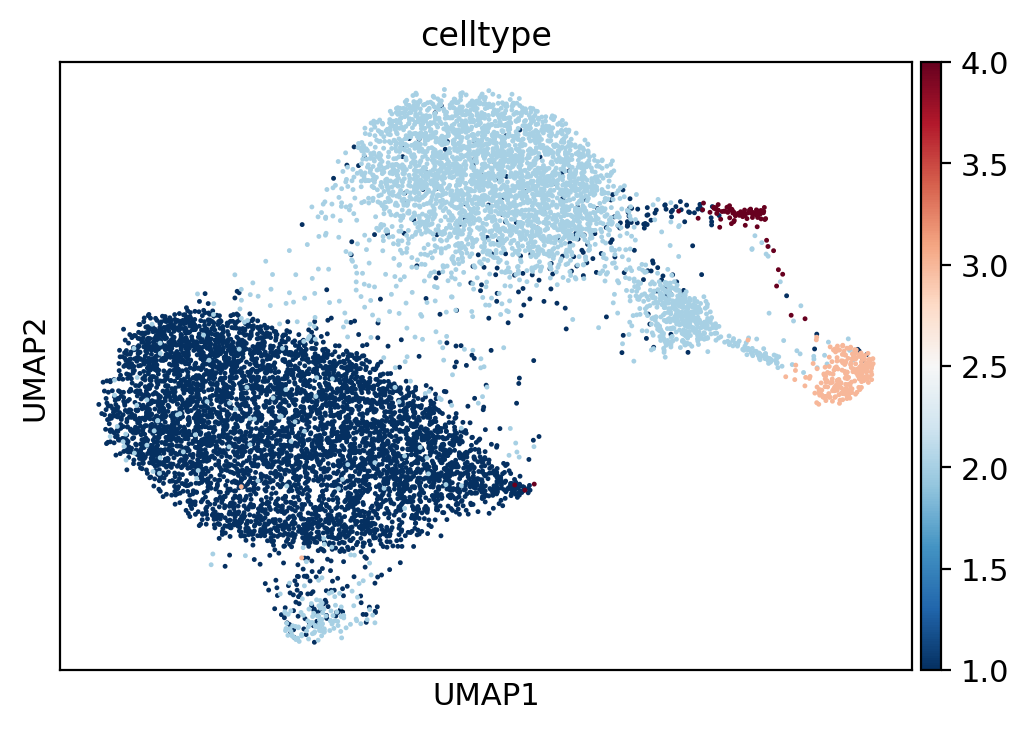

AnnData object with n_obs × n_vars = 9753 × 12584
    obs: 'Neu_IMMGEN', 'PYMT', 'SCT_snn_res.0.1', 'SCT_snn_res.0.5', 'celltype', 'celltype_new', 'doubletCellScore', 'doubletFinder', 'gene.per.umi', 'group', 'immune', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'new_cluster', 'orig.ident', 'percent.mt', 'percent.rp', 'sam', 'sample', 'seurat_clusters'
    obsm: 'X_umap', 'X_pca'
    layers: 'counts'

In [111]:
sc.pl.umap(data, color='celltype')
data

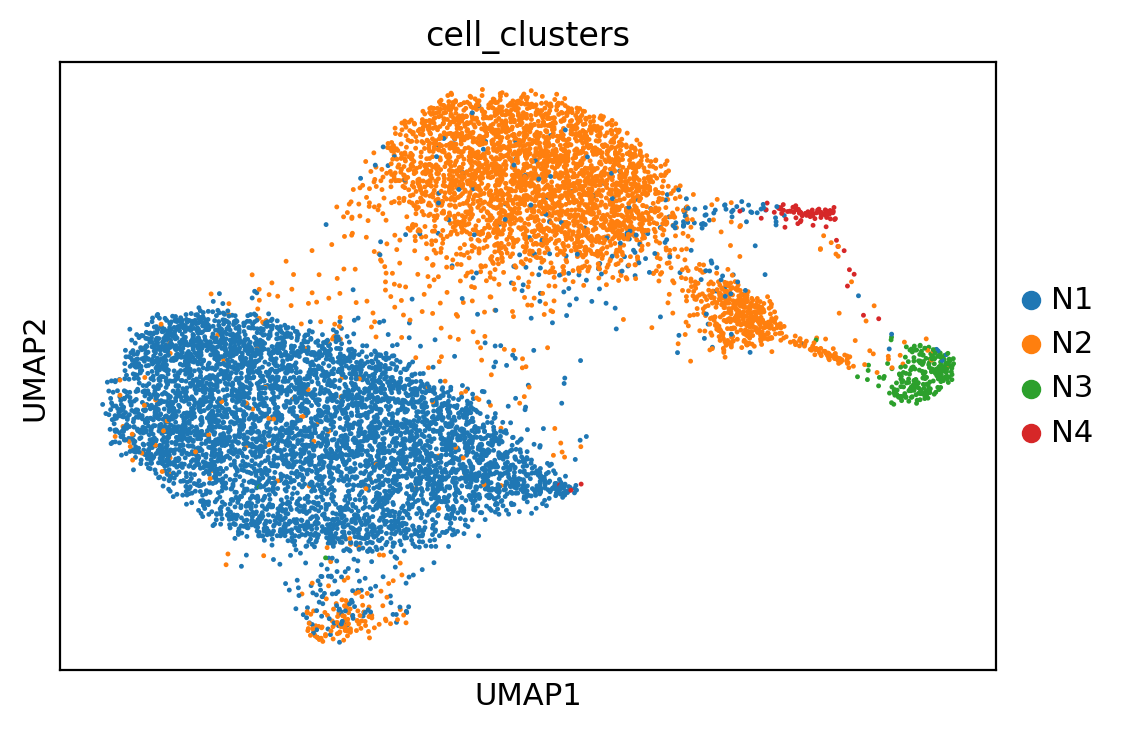

In [113]:
sc.pl.umap(adata,color="cell_clusters")


In [60]:
cr.__version__
#sc.__version__
#cr.__package__

'1.5.1'